# THE CELL BELOW TAKES THE RATING FOR EACH PLAYER FROM WHOSCORED.COM AND GENERATES A GRID OF ALL THE PLAYER RATINGS. THE DROPOFF IS AN EXPONENTIAL DECAY

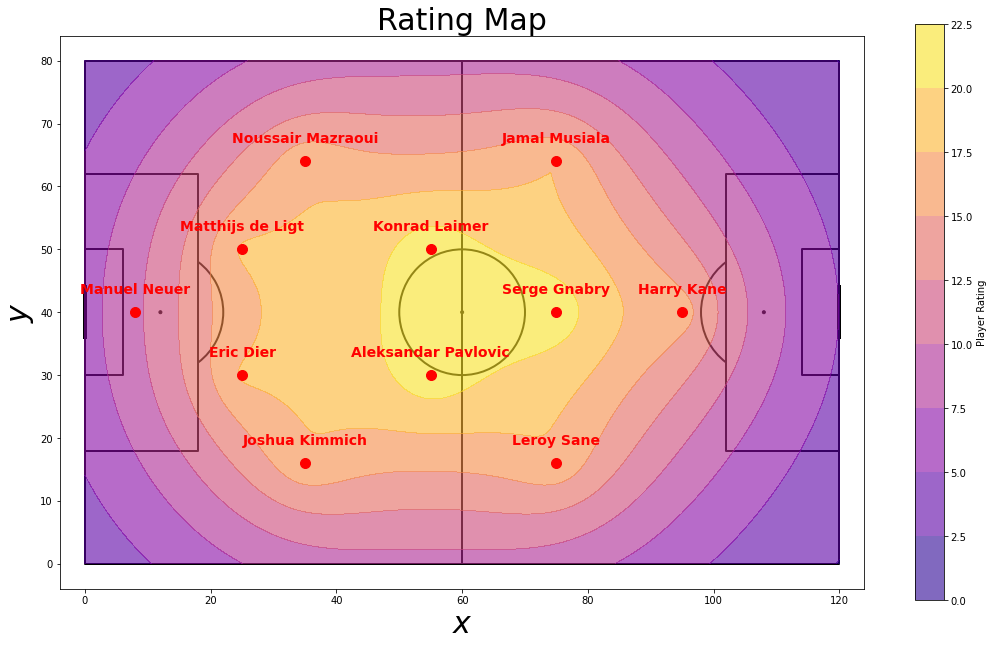

In [148]:
import pandas as pd
import seaborn as sns
from mplsoccer.pitch import Pitch, VerticalPitch
import matplotlib.pyplot as plt
from statsbombpy import sb
from pandas import json_normalize
import numpy as np
import requests
from matplotlib.colors import LinearSegmentedColormap
import ipywidgets as widgets
from scipy.stats import gaussian_kde

# Define grid dimensions
width = 121
height = 81

# Create a mesh grid
x = np.arange(0, width)
y = np.arange(0, height)
X, Y = np.meshgrid(x, y)

# Define player ratings, coordinates, and names
player_ratings = [(95, 40, 7.65,'Harry Kane'),
                 (75, 16, 7.58, 'Leroy Sane'),
                 (75, 64, 7.94, 'Jamal Musiala'),
                 (75, 40, 7.3, 'Serge Gnabry'),
                 (35, 16, 7.23, 'Joshua Kimmich'),
                 (35, 64, 6.78, 'Noussair Mazraoui'),
                 (55, 30, 6.95, 'Aleksandar Pavlovic'),
                 (55, 50, 6.88, 'Konrad Laimer'),
                 (25, 50, 6.95, 'Matthijs de Ligt'),
                 (25, 30, 6.74, 'Eric Dier'),
                 (8, 40, 0, 'Manuel Neuer')]

# Define decay function
def decay(distance, decay_factor=0.05):
    return np.exp(-decay_factor * distance)

# Initialize rating grid
ratings_grid = np.zeros((height, width))

# Calculate ratings for each player
for px, py, rating, _ in player_ratings:
    distance = np.sqrt((X - px) ** 2 + (Y - py) ** 2)
    ratings_grid += rating * decay(distance)

# Create the pitch
pitch = Pitch(pitch_color='white', axis=True, label=True, line_color='black', tick=True)
fig, ax = pitch.draw(figsize=(15, 9))

# Plot contour on the pitch
contour = ax.contourf(X, Y, ratings_grid, cmap='plasma', alpha=0.6)
plt.colorbar(contour, ax=ax, label='Player Rating')

# Scatter plot with annotations for each player
for px, py, _, player_name in player_ratings:
    plt.scatter(px, py, color='red', zorder=10, s=100)  # Add marker for player rating point
    ax.annotate(player_name, (px, py), xytext=(px, py + 3), color='red', fontsize=14, ha='center', fontweight='bold')
    
# Customize pitch
ax.set_xlabel('$x$', fontsize = 30)
ax.set_ylabel('$y$', fontsize = 30)
ax.invert_yaxis()
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_title('Rating Map', fontsize = 30)

plt.show()

In [93]:
np.size(player_ratings)

44

# THE CELLS BELOW ARE FOR TRYING TO GET MATCH DATA PLOTTED INTO HEATMAPS WITH BINS. SOURCE: FRENCH YOUTUBE GUY

In [154]:
# data = sb.matches(competition_id=16, season_id=2)
# data

In [155]:
# events = requests.get('https://raw.githubusercontent.com/statsbomb/open-data/master/data/events/15978.json')
# events = events.json()

# df = json_normalize(events, sep = "_")

In [156]:
# pd.set_option("display.max.columns",None)

# df.head(5)

In [157]:
# df_pass = df.loc[(df['type_name']=='Pass') & (df['team_name']=="Real Sociedad")]

# location_xy = df_pass.location.apply(pd.Series)

# location_xy.columns = ['x','y']

In [158]:
# location_xy.dropna(inplace = True)
# location_xy.head(5)

In [159]:
# pitch = Pitch(pitch_type='statsbomb',line_zorder=2,
#               pitch_color = '#22312b', line_color='white', orientation='vertical')
# fig, ax = pitch.draw()

# bins = (6,5)
# bin_stat = pitch.bin_statistic(location_xy.x, location_xy.y,statistic='count',bins=bins)
# pitch.heatmap(bin_stat,ax=ax, cmap='coolwarm')
# pitch.scatter(location_xy.x, location_xy.y,c='white',s=20,ax=ax)
# plt.show()

# THE CODE BELOW PLOTS HEAT MAPS OF PASSES RECEIVED. SOURCE: MEDIUM ARTICLE

In [141]:
# Read data
df = pd.read_csv("WalkthroughLaLiga.csv")

# Make a list of the unique receiver names
options = df["receiver"].unique().tolist()
options = [x for x in options if str(x) != 'nan']

# Create a list to store the player widgets
player_widgets = []

# Create and display 10 player selection widgets
for i in range(10):
    player_widget = widgets.Combobox(
        placeholder='Enter a name',
        options=options,
        description=f'Player {i+1}:',
        ensure_option=True,
        disabled=False
    )
    player_widgets.append(player_widget)
    display(player_widget)

Combobox(value='', description='Player 1:', ensure_option=True, options=('Rodrigo Battaglia', 'Koke', 'Pedro B…

Combobox(value='', description='Player 2:', ensure_option=True, options=('Rodrigo Battaglia', 'Koke', 'Pedro B…

Combobox(value='', description='Player 3:', ensure_option=True, options=('Rodrigo Battaglia', 'Koke', 'Pedro B…

Combobox(value='', description='Player 4:', ensure_option=True, options=('Rodrigo Battaglia', 'Koke', 'Pedro B…

Combobox(value='', description='Player 5:', ensure_option=True, options=('Rodrigo Battaglia', 'Koke', 'Pedro B…

Combobox(value='', description='Player 6:', ensure_option=True, options=('Rodrigo Battaglia', 'Koke', 'Pedro B…

Combobox(value='', description='Player 7:', ensure_option=True, options=('Rodrigo Battaglia', 'Koke', 'Pedro B…

Combobox(value='', description='Player 8:', ensure_option=True, options=('Rodrigo Battaglia', 'Koke', 'Pedro B…

Combobox(value='', description='Player 9:', ensure_option=True, options=('Rodrigo Battaglia', 'Koke', 'Pedro B…

Combobox(value='', description='Player 10:', ensure_option=True, options=('Rodrigo Battaglia', 'Koke', 'Pedro …

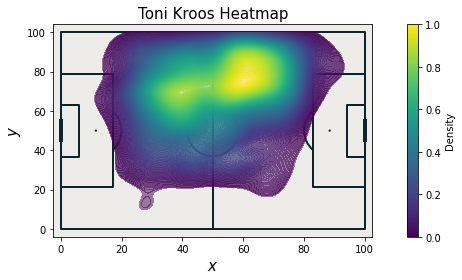

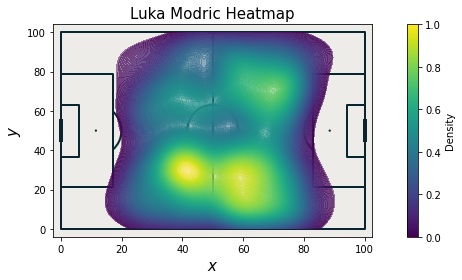

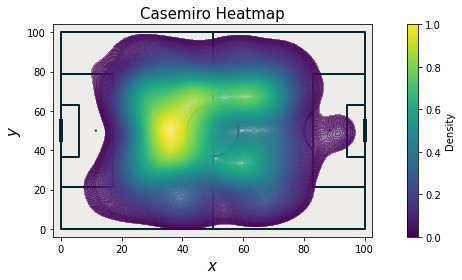

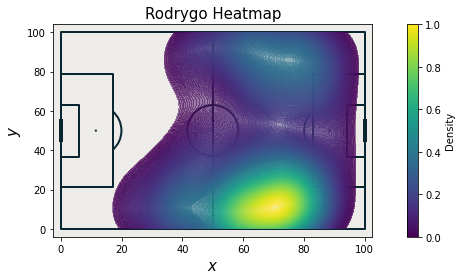

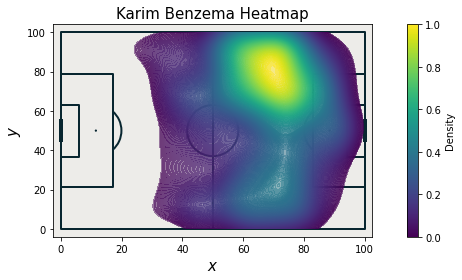

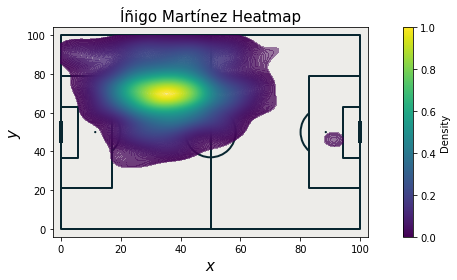

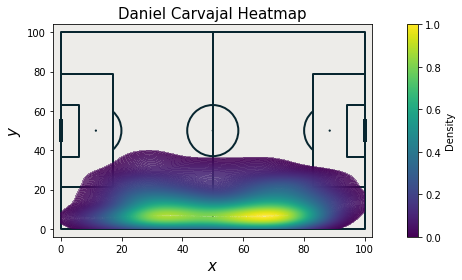

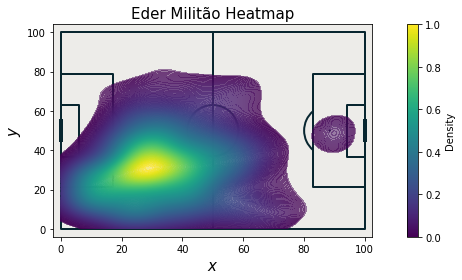

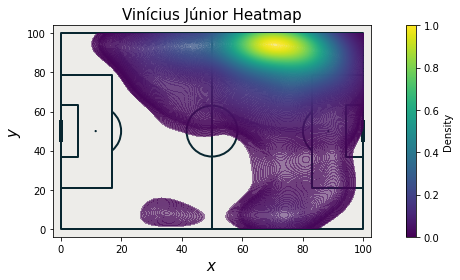

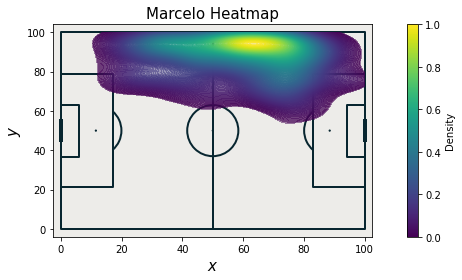

In [165]:
# Plot KDE heat maps for selected players
for i, player_widget in enumerate(player_widgets):
    player_name = player_widget.value
    
    # Filter dataframe to only include passes received by the selected player
    player_df = df[df['receiver'] == player_name]
    
    # Create pitch object
    pitch = Pitch(pitch_type='opta', pitch_color='#edece9', axis=True, label=True, line_color='#082630', tick=True)
    
    # Draw pitch
    fig, ax = pitch.draw(figsize=(10, 4))
    
    # Plot KDE heat map
    kde = pitch.kdeplot(player_df.end_x, player_df.end_y, statistic='count', ax=ax, cmap='viridis',
                        shade=True, shade_lowest=False, n_levels=400, linewidths=3, alpha=.5, zorder=.99)
    
    # Add colorbar
    sm = plt.cm.ScalarMappable(cmap='viridis')
    sm.set_array([])  # Set dummy array to ensure the colorbar knows the range of values
    colorbar = plt.colorbar(sm, ax=ax)
    colorbar.set_label('Density')
    
    ax.set_xlabel('$x$', fontsize=15)
    ax.set_ylabel('$y$', fontsize=15)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.set_title(f'{player_name} Heatmap', fontsize=15)
    
    # Show the plot
    plt.show()